In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


 **1. Load and clean the dataset**

In [ ]:
df = pd.read_csv("EDA_project_dataset.csv")
print(df.info())
print("Missing values:", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             10000 non-null  object 
 1   Time             10000 non-null  object 
 2   Booking ID       10000 non-null  object 
 3   Booking Status   10000 non-null  object 
 4   Customer ID      10000 non-null  object 
 5   Vehicle Type     10000 non-null  object 
 6   City             10000 non-null  object 
 7   Pickup Location  10000 non-null  object 
 8   Drop Location    10000 non-null  object 
 9   Fare (INR)       10000 non-null  float64
dtypes: float64(1), object(9)
memory usage: 781.4+ KB
None
Missing values: Date               0
Time               0
Booking ID         0
Booking Status     0
Customer ID        0
Vehicle Type       0
City               0
Pickup Location    0
Drop Location      0
Fare (INR)         0
dtype: int64
Duplicate rows: 0


**Drop duplicates if any**


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.head(3)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,City,Pickup Location,Drop Location,Fare (INR)
0,2025-06-25,12:00:51,be09ad20-1048-4d52-b2b3-2cb3aec12bd9,Ongoing,1887efac-cbe3-422b-b154-97bbf86a1eba,Auto,Ahmedabad,Viswanathan Marg,Iyengar Ganj,675.56
1,2025-06-20,1:09:13,5076e372-2770-4f3e-9eb8-65eb83dafccc,Completed,ac2f1ddd-fb1f-4e6f-864d-413d639926b8,Prime Sedan,Lucknow,Dhingra Street,Kohli Road,969.37
2,2025-07-04,13:45:18,bc126a53-9ff2-493b-8878-dece53ce4b7e,Completed,78ab7ccc-88a9-4dbd-b35e-27003b9294c8,Auto,Lucknow,Korpal Circle,Tata Ganj,1252.80


**Convert date columns if needed (adjust column name)**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

**2. Analyze booking trends over time**

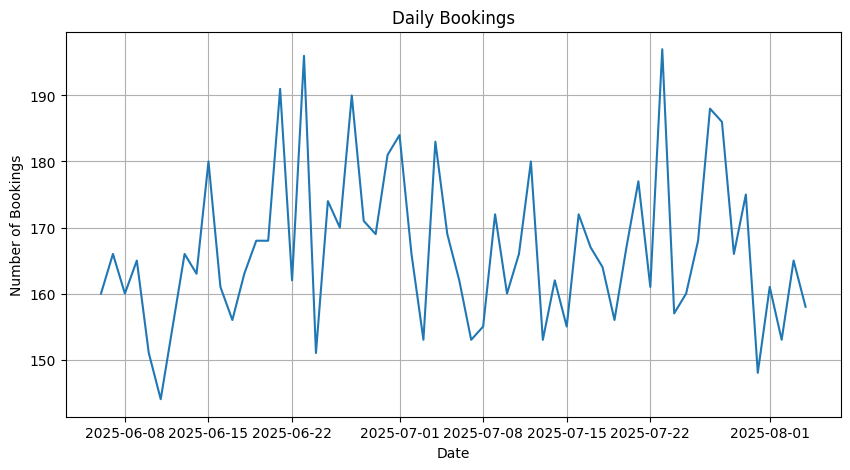

In [ ]:
df['Month'] = df['Date'].dt.to_period('M')
df['Week'] = df['Date'].dt.to_period('W')
df['Day'] = df['Date'].dt.date

daily_trend = df.groupby('Day').size()
monthly_trend = df.groupby('Month').size()
weekly_trend = df.groupby('Week').size()

plt.figure(figsize=(10, 5))
daily_trend.plot(title="Daily Bookings")
plt.xlabel("Date")
plt.ylabel("Number of Bookings")
plt.grid()
plt.show()

**3. Most popular vehicle types and cities**

In [ ]:
print("\nTop Vehicle Types:\n", df['Vehicle Type'].value_counts())
print("\nTop Cities:\n", df['City'].value_counts())


Top Vehicle Types:
 Vehicle Type
eBike          1483
Mini           1472
Auto           1431
Prime Plus     1428
Prime Sedan    1418
Prime SUV      1401
Bike           1367
Name: count, dtype: int64

Top Cities:
 City
Bangalore    1092
Mumbai       1044
Delhi        1017
Kolkata      1016
Ahmedabad    1015
Lucknow       984
Hyderabad     984
Jaipur        950
Pune          949
Chennai       949
Name: count, dtype: int64


**4. Fare distributions**

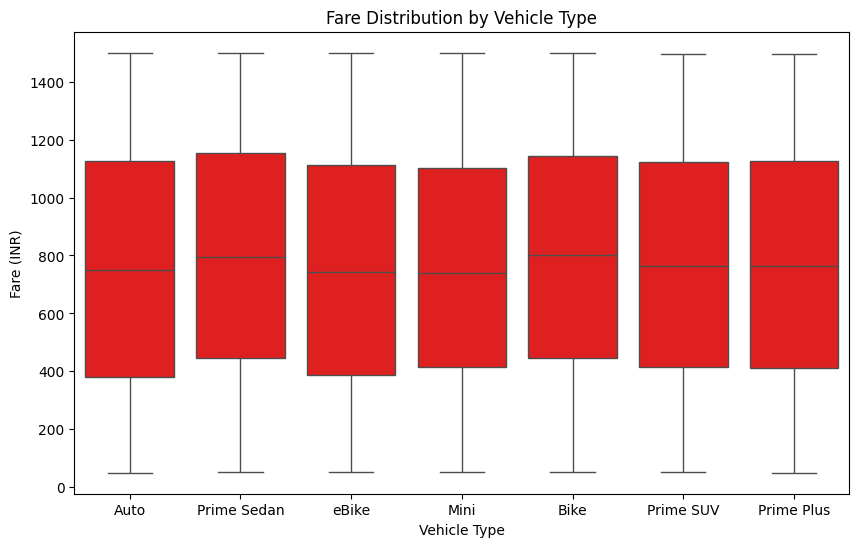

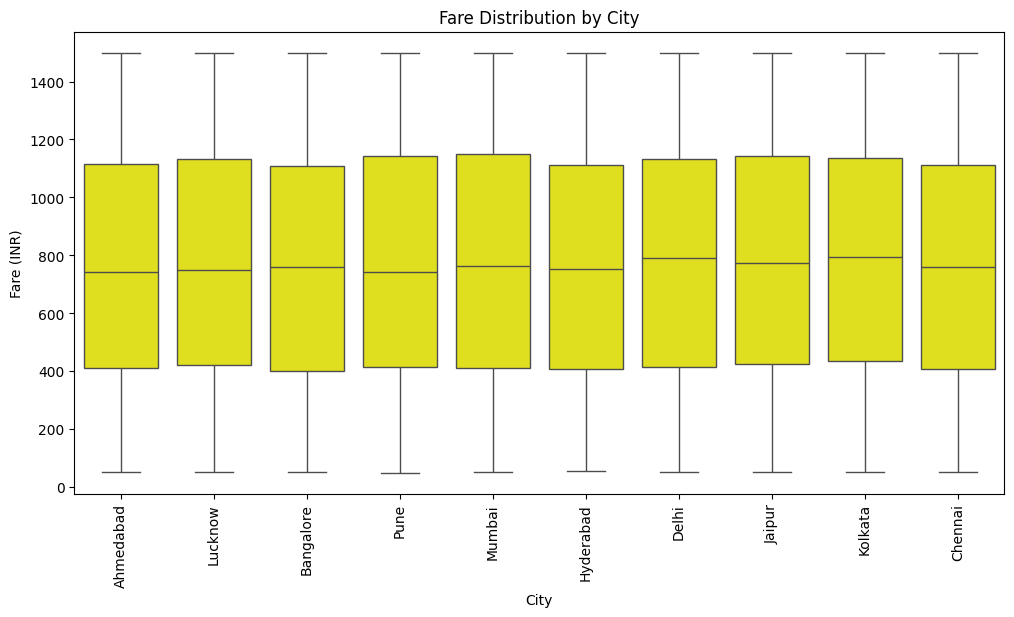

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vehicle Type', y='Fare (INR)', data=df,color='red')
plt.xlabel("Vehicle Type")
plt.ylabel("Fare (INR)")
plt.title("Fare Distribution by Vehicle Type")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Fare (INR)', data=df,color='yellow')
plt.xlabel("City")
plt.ylabel("Fare (INR)")
plt.title("Fare Distribution by City")
plt.xticks(rotation=90)
plt.show()

**5. Booking status frequencies**

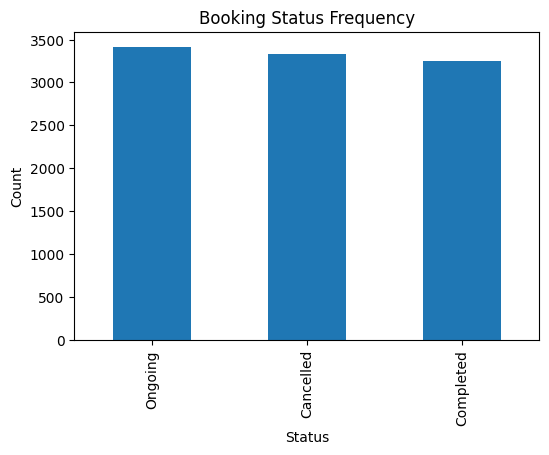

In [ ]:
plt.figure(figsize=(6, 4))
df['Booking Status'].value_counts().plot(kind='bar', title="Booking Status Frequency")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

**6. Segment customers by booking patterns**

In [ ]:
customer_seg = df.groupby('Customer ID').agg({
    'Booking ID': 'count',
    'Fare (INR)': 'mean',
    'Date': ['min', 'max']
}).reset_index()
customer_seg.columns = ['Customer ID', 'Total Bookings', 'Avg Fare', 'First Booking', 'Last Booking']
print(customer_seg.head())

                            Customer ID  Total Bookings  Avg Fare  \
0  00072147-69b1-49ac-8bcc-33c2234600a3               1   1046.91   
1  000b2bac-f35e-4f30-bbee-690dfb5ec22d               1    152.30   
2  000e67f4-2708-4b69-aa0b-a3ae31db5387               1   1216.03   
3  001c2193-f920-4948-8c71-bd697cc80f8b               1    465.20   
4  00242946-fb3c-4d37-948f-37d097acdb4c               1   1285.65   

  First Booking Last Booking  
0    2025-06-27   2025-06-27  
1    2025-06-21   2025-06-21  
2    2025-06-23   2025-06-23  
3    2025-07-11   2025-07-11  
4    2025-07-11   2025-07-11  


**7. Anomalies or patterns**

In [ ]:
high_fare = df[df['Fare (INR)'] > df['Fare (INR)'].quantile(0.99)]
print("\nTop 1% High Fare Bookings:\n", high_fare)


Top 1% High Fare Bookings:
            Date      Time                            Booking ID  \
172  2025-06-09  16:47:29  a795053e-25b2-4236-8c7a-634dff193396   
194  2025-06-07   3:45:11  458c20a2-ed55-4a49-921c-1c59b0f312cf   
327  2025-07-31  12:58:47  5e059511-ccd5-4128-9d66-52c1c1b849e4   
406  2025-07-26   5:14:18  7b57ec3e-5814-440c-835a-1634392aa50c   
499  2025-07-09  20:34:50  b194ead5-f7cd-41b8-b408-8e03c924581a   
...         ...       ...                                   ...   
9604 2025-08-02   2:48:01  3f7c6c6a-25c7-4d13-811d-78bcffc83127   
9837 2025-07-02  22:02:18  b5e17b62-119d-4d89-899b-a72b5c80a5c2   
9942 2025-06-12   1:59:22  adaee2d6-d5db-4341-8b95-0d1a68e7510f   
9982 2025-07-12  16:24:34  7a552a16-bf91-4035-990a-7dc3144a57c7   
9990 2025-06-11   3:16:23  2db478fd-2989-4209-a7ff-35c519638727   

     Booking Status                           Customer ID Vehicle Type  \
172       Completed  7235dbf6-83a2-47e7-aa25-d173c83680d3   Prime Plus   
194       Cancelle

**Bonus: Basic clustering**

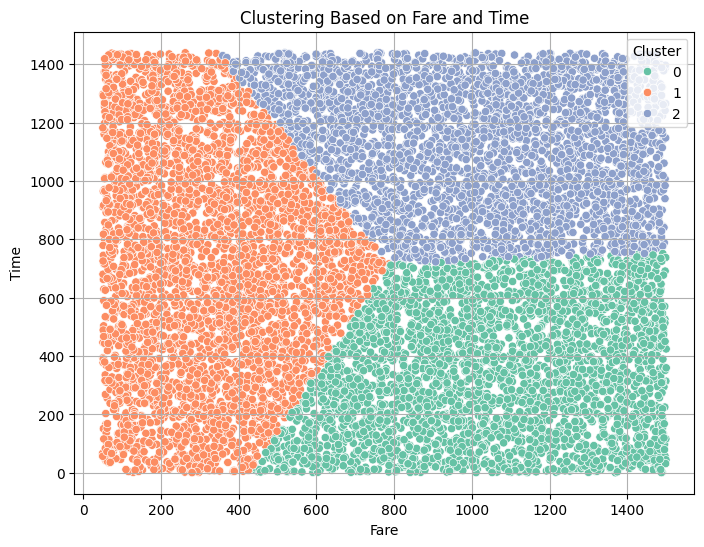

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


df['Time'] = pd.to_timedelta(df['Time'])

# Extract total wait time in minutes
df['Time (min)'] = df['Time'].dt.total_seconds() / 60

features = df[['Fare (INR)', 'Time (min)']].dropna()

# Scale features
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

# Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled)

# Visualize
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features['Fare (INR)'], y=features['Time (min)'], hue=df['Cluster'], palette='Set2')
plt.title("Clustering Based on Fare and Time")
plt.xlabel("Fare")
plt.ylabel("Time")
plt.grid(True)
plt.show()


In [ ]:
df.head(3)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,City,Pickup Location,Drop Location,Fare (INR),Month,Week,Day,Booking Hour,Cluster,Time (min)
0,2025-06-25,0 days 12:00:51,be09ad20-1048-4d52-b2b3-2cb3aec12bd9,Ongoing,1887efac-cbe3-422b-b154-97bbf86a1eba,Auto,Ahmedabad,Viswanathan Marg,Iyengar Ganj,675.56,2025-06,2025-06-23/2025-06-29,2025-06-25,0,1,720.850000
1,2025-06-20,0 days 01:09:13,5076e372-2770-4f3e-9eb8-65eb83dafccc,Completed,ac2f1ddd-fb1f-4e6f-864d-413d639926b8,Prime Sedan,Lucknow,Dhingra Street,Kohli Road,969.37,2025-06,2025-06-16/2025-06-22,2025-06-20,0,0,69.216667
2,2025-07-04,0 days 13:45:18,bc126a53-9ff2-493b-8878-dece53ce4b7e,Completed,78ab7ccc-88a9-4dbd-b35e-27003b9294c8,Auto,Lucknow,Korpal Circle,Tata Ganj,1252.80,2025-07,2025-06-30/2025-07-06,2025-07-04,0,2,825.300000
